In [1]:
# importing libraries

# for data manipulation
import numpy as np
import pandas as pd
import pylab as pl

# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Objectives 

- Reading and pre-processing the data via
    - Data Cleaning 
    - EDA
- Building a baseline model for click-through rate (CTR) prediction of a web-site (data obtained from kaggle)

In [2]:
# read csv
df=pd.read_csv("/Users/ankuranurag/Desktop/data.csv")

# Data Cleaning

Data Cleaning involves sanitary checks on data, heuristically eliminating noise in the data. 

I will be performing the following checks on the data. 

1. Drop columns that do not add any information.
2. Check for missing values and deal with missing values. 
3. Check and deal with outliers.

There are too many numerical columns hence I will have to check for outlier.

In [3]:
# Check the data shape
df.shape

(99999, 27)

In [4]:
# information about dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [5]:
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000
mean,1004.96755,0.28994,1.01639,0.32945,18857.23173,318.83455,60.27874,2114.61304,1.43990,227.23493,53292.00195,83.16354,10.00000,2.59284,25.48575,11.30067,0.16980
std,1.09192,0.50571,0.53110,0.85467,4944.91948,21.51075,47.71344,607.46944,1.32682,351.47237,49952.34037,70.16108,0.00000,1.72300,2.96852,5.93872,0.37546
min,1001.00000,0.00000,0.00000,0.00000,375.00000,120.00000,20.00000,112.00000,0.00000,33.00000,-1.00000,1.00000,10.00000,0.00000,21.00000,0.00000,0.00000
25%,1005.00000,0.00000,1.00000,0.00000,16920.00000,320.00000,50.00000,1863.00000,0.00000,35.00000,-1.00000,23.00000,10.00000,1.00000,23.00000,7.00000,0.00000
50%,1005.00000,0.00000,1.00000,0.00000,20346.00000,320.00000,50.00000,2323.00000,2.00000,39.00000,100050.00000,61.00000,10.00000,2.00000,26.00000,11.00000,0.00000
75%,1005.00000,1.00000,1.00000,0.00000,21893.00000,320.00000,50.00000,2526.00000,3.00000,171.00000,100093.00000,101.00000,10.00000,4.00000,28.00000,16.00000,0.00000
max,1012.00000,7.00000,5.00000,5.00000,24043.00000,1024.00000,1024.00000,2757.00000,3.00000,1839.00000,100248.00000,255.00000,10.00000,6.00000,30.00000,23.00000,1.00000


In [6]:
df.describe(include='object')

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,99999,99999,99999,99999,99999,99999,99999,99999,99999
unique,1485,1331,19,1354,96,21,16801,78013,3145
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,36022,37362,40839,63977,67464,64769,82579,521,6041


As observed above categorical columns like site_id, site_domain have high unique values hence need to convert the columns into a numeric form we will use label encoding rather than one-hot encoding.

## Check for missing values.  

In [7]:
missing_data=(df.isnull().sum()/df.isnull().count())
missing_data

click              0.00000
C1                 0.00000
banner_pos         0.00000
site_id            0.00000
site_domain        0.00000
site_category      0.00000
app_id             0.00000
app_domain         0.00000
app_category       0.00000
device_id          0.00000
device_ip          0.00000
device_model       0.00000
device_type        0.00000
device_conn_type   0.00000
C14                0.00000
C15                0.00000
C16                0.00000
C17                0.00000
C18                0.00000
C19                0.00000
C20                0.00000
C21                0.00000
month              0.00000
dayofweek          0.00000
day                0.00000
hour               0.00000
y                  0.00000
dtype: float64

As seen above there are no missing value to deal with

# EDA

In the section on EDA let's explore the frequency distributions of all columns

In [8]:
import math

In [9]:
# number of columns in the sub plot 
n=2

## Dealing with Outliers

In [10]:
# column C15 has large difference in 99 percentile and max value hence will be dropped (as observed from df.describe())
df['C15'].quantile(0.99),df['C15'].max()

(320.0, 1024)

In [11]:
# column C16 has large difference in 99 percentile and max value hence will be dropped 
df['C16'].quantile(0.99),df['C16'].max()

(250.0, 1024)

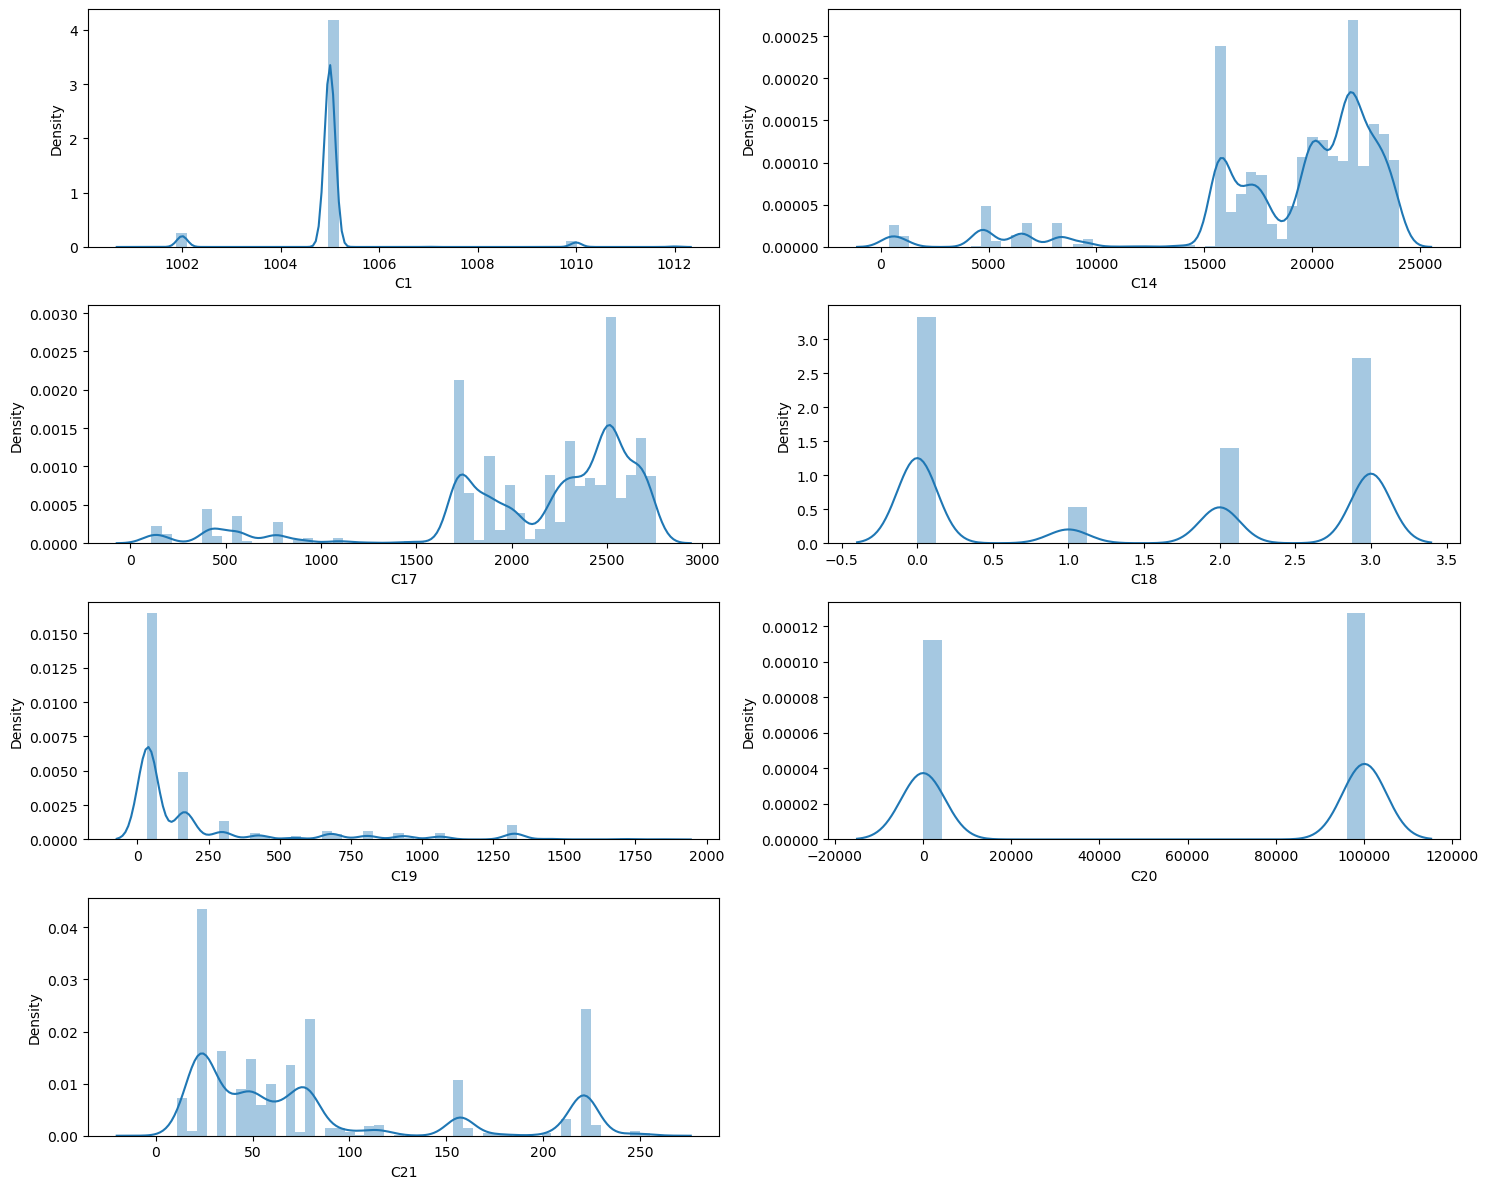

In [12]:
# Code to plot histograms for all remaining numerical columns
numerical_1=['C1','C14','C17','C18','C19','C20','C21']
plt.figure(figsize=[15,3*math.ceil(len(numerical_1)/n)])

for i in range(len(numerical_1)):
    plt.subplot(math.ceil(len(numerical_1)/n),n,i+1)
    sns.distplot(df[numerical_1[i]])

plt.tight_layout()
plt.show()

In [13]:
#drop columns having no significance in building predictive models
df=df.drop(['month','click','device_id','C15','C16'],axis=1)

In [14]:
# Detail of numerical columns are dealing with outliers
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C17,C18,C19,C20,C21,dayofweek,day,hour,y
count,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000,99999.00000
mean,1004.96755,0.28994,1.01639,0.32945,18857.23173,2114.61304,1.43990,227.23493,53292.00195,83.16354,2.59284,25.48575,11.30067,0.16980
std,1.09192,0.50571,0.53110,0.85467,4944.91948,607.46944,1.32682,351.47237,49952.34037,70.16108,1.72300,2.96852,5.93872,0.37546
min,1001.00000,0.00000,0.00000,0.00000,375.00000,112.00000,0.00000,33.00000,-1.00000,1.00000,0.00000,21.00000,0.00000,0.00000
25%,1005.00000,0.00000,1.00000,0.00000,16920.00000,1863.00000,0.00000,35.00000,-1.00000,23.00000,1.00000,23.00000,7.00000,0.00000
50%,1005.00000,0.00000,1.00000,0.00000,20346.00000,2323.00000,2.00000,39.00000,100050.00000,61.00000,2.00000,26.00000,11.00000,0.00000
75%,1005.00000,1.00000,1.00000,0.00000,21893.00000,2526.00000,3.00000,171.00000,100093.00000,101.00000,4.00000,28.00000,16.00000,0.00000
max,1012.00000,7.00000,5.00000,5.00000,24043.00000,2757.00000,3.00000,1839.00000,100248.00000,255.00000,6.00000,30.00000,23.00000,1.00000


In [15]:
df.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_ip,device_model,...,C14,C17,C18,C19,C20,C21,dayofweek,day,hour,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,962c8333,be6db1d7,...,22683,2528,0,39,100075,221,1,28,14,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,5b1f94b9,1b13b020,...,17037,1934,2,39,-1,16,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a9a84f4c,9a45a8e8,...,22155,2552,3,167,100202,23,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,88c62dad,ea6abc60,...,21591,2478,3,167,100074,23,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,1e5e0d0e,36d749e5,...,15708,1722,0,35,-1,79,1,21,8,1


# Data prep for linear models

1. Creating a dummy variables for categorical columns like 'banner_pos','device_type','device_conn_type' using one hot or dummy encoding.
 
2. Using a label encoding for categorical columns like 'site_id','site_domain','site_category', which are having large number of unique values and not to have sepreate columns for each unique values.

In [16]:
# number of columns before dummy data 
df.shape

(99999, 22)

In [17]:
# One hot or dummy encoding
df=pd.get_dummies(df,columns=['banner_pos','device_type','device_conn_type','dayofweek','hour'],drop_first=True)

In [18]:
# number of columns after dummy data 
df.shape

(99999, 58)

In [19]:
# information of added columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   C1                  99999 non-null  int64 
 1   site_id             99999 non-null  object
 2   site_domain         99999 non-null  object
 3   site_category       99999 non-null  object
 4   app_id              99999 non-null  object
 5   app_domain          99999 non-null  object
 6   app_category        99999 non-null  object
 7   device_ip           99999 non-null  object
 8   device_model        99999 non-null  object
 9   C14                 99999 non-null  int64 
 10  C17                 99999 non-null  int64 
 11  C18                 99999 non-null  int64 
 12  C19                 99999 non-null  int64 
 13  C20                 99999 non-null  int64 
 14  C21                 99999 non-null  int64 
 15  day                 99999 non-null  int64 
 16  y                   99

Separate out categorical and numerical columns 

In [20]:
numerical = []
categorical = []

for column in (df.columns):
    if df[column].dtype == "object":
        categorical.append(column)
    else:
        numerical.append(column)

In [21]:
#label encoding for categorical column having large no. of unique values
from sklearn.preprocessing import LabelEncoder

In [22]:
labelencoder=LabelEncoder()

In [23]:
categorical

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_ip',
 'device_model']

In [24]:
for col in df[categorical]:
    df[col]=labelencoder.fit_transform(df[col])

To standardize the numeric data values after encoding into a normalized format StandardScaler() function was used

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scalar=StandardScaler()
df[numerical_1]=scalar.fit_transform(df[numerical_1])

In [27]:
df[categorical]=scalar.fit_transform(df[categorical])

In [28]:
# number of columns after encoding
df.shape

(99999, 58)

Finalized form of data before Model Prediction

In [29]:
df.head()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_ip,device_model,C14,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.02972,0.18653,-1.36883,1.40782,0.52176,0.07773,-0.45500,0.30461,0.83362,0.77368,...,1,0,0,0,0,0,0,0,0,0
1,0.02972,1.57646,-0.70713,1.40782,0.52176,0.07773,-0.45500,-0.49878,-1.38676,-0.36810,...,0,0,0,0,0,1,0,0,0,0
2,0.02972,1.59303,0.66307,-1.09773,0.52176,0.07773,-0.45500,0.56931,0.34755,0.66690,...,0,0,0,0,1,0,0,0,0,0
3,-2.71776,-1.75882,-2.23964,-0.47134,0.52176,0.07773,-0.45500,0.12494,1.48969,0.55285,...,0,0,0,0,0,1,0,0,0,0
4,0.02972,-1.48526,1.16246,-1.09773,0.52176,0.07773,-0.45500,-1.32048,-0.99882,-0.63687,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [30]:
# collect all features in a list 
features = list(df.columns)

#remove y from the list of features 
features.remove('y')

In [31]:
# Separate 
x = df[features]
y = df['y']

In [32]:
from sklearn.model_selection import train_test_split

Created a small dataset for test since there are low number of data points. 

In [33]:
# create a train test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [34]:
X_train.shape

(69999, 57)

In [35]:
X_test.shape

(30000, 57)

I will use the test set to test the model performance at the end of the model selection process. 

# Build baseline models 

Using Logistic Regression,Decision Tree and Random Forest I will build a baseline model for each algorithm. The performance of these models will be used as the baseline. And any model we build after this needs to perform better than this one. 

1. Build a baseline model with LogisticRegression,DecisionTreeRegressor and RandomForestRegressor. 

2. Create a data frame(temp) to store the model results and the performance metrics. 

In [36]:
# Load LogisticRegression modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [37]:
logisticregression=LogisticRegression()

In [38]:
# Fit train data to LogisticRegression model
logisticregression.fit(X_train,y_train)

LogisticRegression()

In [39]:
#Cross Validation Scores for the model
#accuracy score of the model
crossvalidation=cross_val_score(logisticregression,X_train,y_train,cv=5,n_jobs=None)
crossvalidation

array([0.8305    , 0.83042857, 0.83042857, 0.83042857, 0.83048789])

In [40]:
# load the performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [41]:
# pedictions on the train data set
y_predict=logisticregression.predict(X_train)

In [42]:
# evaluation metrics value
acc_score=accuracy_score(y_train,y_predict)
RSME=mean_squared_error(y_train,y_predict,squared=False)
print("accuracy score for the model is : ",acc_score)
print("RSME error score for the model is :",RSME)

accuracy score for the model is :  0.8304547207817254
RSME error score for the model is : 0.41175876337762934


In [43]:
# pedictions on the test data set
# evaluation metrics value
y_predict_test=logisticregression.predict(X_test)
acc_score_test=accuracy_score(y_test,y_predict_test)
RSME_test=mean_squared_error(y_test,y_predict_test,squared=False)
print("accuracy score(test) for the model is : ",acc_score)
print("RSME error(test) score for the model is :",RSME)

accuracy score(test) for the model is :  0.8304547207817254
RSME error(test) score for the model is : 0.41175876337762934


In [44]:
# UDF to create an entry to store the data and performance metric values
def store_results(name, y_predict, y_train,y_predict_test, y_test, X_train, X_test, model, folds, norm, Alpha):
 
  RSME = mean_squared_error(y_train,y_predict,squared=False)
  RSME_test=mean_squared_error(y_test,y_predict_test,squared=False)  
  crossvalidation = cross_val_score(model, X_train, y_train,cv=folds)
  entry = {'Model': [name],
          'Regularization' : [norm],
          'Alpha_value' : [Alpha],
          'RMSE': [RSME],
          'RMSE_Test': [RSME_test],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }

  result = pd.DataFrame(entry)
  return result

In [45]:
#Store the model performance in temp
temp=store_results("Baseline_LR",y_predict,y_train,y_predict_test,y_test,X_train,X_test,logisticregression,5,np.NaN,np.NaN)


In [46]:
temp

,Model,Regularization,Alpha_value,RMSE,RMSE_Test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Baseline_LR,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049


In [47]:
# coefficients of the LogisticRegression model 

logisticregression.coef_

array([[-0.00919098,  0.04154243, -0.09977501, -0.18125686,  0.09153765,
        -0.02805277, -0.01812486,  0.02280048,  0.01720547, -0.30718776,
         0.24938598, -0.06050909, -0.01951915, -0.123103  , -0.19486617,
        -0.01302317,  0.17125626, -0.00849547,  0.00626334, -0.00772077,
        -0.00693746,  0.13720859, -0.09558969, -0.40354501, -0.08440781,
        -0.22388681, -1.21568778, -0.0755613 , -0.21213303, -0.27569988,
        -0.09137382, -0.15908454, -0.17617982, -0.2249386 ,  0.01346609,
        -0.12568304, -0.01906629, -0.06338371, -0.14915486, -0.01862999,
        -0.01584971,  0.0019552 ,  0.06977883, -0.01788691, -0.04956209,
         0.05470626, -0.00397983,  0.01878806, -0.02683217,  0.00902005,
        -0.00976304, -0.06599551, -0.10145435, -0.16460366, -0.12069344,
        -0.04806063,  0.11272152]])

In [48]:
# Load Decision tree modules
from sklearn.tree import DecisionTreeRegressor

In [49]:
decisiontree=DecisionTreeRegressor(random_state=10)

In [50]:
# Fit train data to decisiontree model
decisiontree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

In [51]:
#Cross Validation Scores for the model
crossvalidation=cross_val_score(decisiontree,X_train,y_train,cv=5,n_jobs=None)
crossvalidation

array([-0.80075409, -0.86797386, -0.7880244 , -0.81456953, -0.83076171])

In [52]:
# pedictions on the train data set
# pedictions on the test data set
y_predict_dt=decisiontree.predict(X_train)
y_predict_dt_test=decisiontree.predict(X_test)

In [53]:
#Store the model performance in temp_1
temp_1=store_results("Baseline_DT",y_predict_dt,y_train,y_predict_dt_test,y_test,X_train,X_test,decisiontree,5,np.NaN,np.NaN)


In [54]:
#Merge to existing results
temp=temp.append(temp_1)

In [55]:
temp

,Model,Regularization,Alpha_value,RMSE,RMSE_Test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Baseline_LR,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Baseline_DT,NaN,NaN,0.01889,0.50406,-0.82042,-0.80075,-0.86797,-0.78802,-0.81457,-0.83076


In [56]:
# Load Random forest modules
# Fit train data to random forest model
from sklearn.ensemble import RandomForestRegressor
randomforestregressor = RandomForestRegressor(random_state=10)
randomforestregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [57]:
#Cross Validation Scores for the model
crossvalidation=cross_val_score(randomforestregressor,X_train,y_train,cv=5,n_jobs=None)
crossvalidation

array([0.03126748, 0.02426127, 0.02836049, 0.02668625, 0.0098501 ])

In [58]:
# pedictions on the train data set
# pedictions on the test data set
y_predict_rf=randomforestregressor.predict(X_train)
y_predict_rf_test=randomforestregressor.predict(X_test)

In [61]:
#Store the model performance in temp_2
temp_2=store_results("Baseline_RF",y_predict_rf,y_train,y_predict_rf_test,y_test,X_train,X_test,randomforestregressor,5,np.NaN,np.NaN)


In [62]:
#Merge to existing results
temp=temp.append(temp_2)

In [63]:
temp

,Model,Regularization,Alpha_value,RMSE,RMSE_Test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Baseline_LR,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Baseline_DT,NaN,NaN,0.01889,0.50406,-0.82042,-0.80075,-0.86797,-0.78802,-0.81457,-0.83076
0,Baseline_RF,NaN,NaN,0.13944,0.37172,0.02409,0.03127,0.02426,0.02836,0.02669,0.00985


## Objectives 

1. Perform feature selection
2. Perform model selection 
3. Make the model as generalizable as possible.  

In [64]:
X_train.shape

(69999, 57)

In [65]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

## Feature selection

## Feature selection with correlation plots. 

Correlation plots are a way to detect if changes in one variable create the changes in the other variable. For instance, if two variables exhibit a strong positive correlation, then if one of the variables increases, the other also increases. The rate of increase can be linear or non-linear. 

Using the correlation plots, I can detect such correlated features and drop them.

In [66]:
#corelation
corr = X_train.corr()
corr.style.background_gradient()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_ip,device_model,C14,C17,C18,C19,C20,C21,day,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
C1,1.000000,0.006056,0.126228,0.030155,-0.222736,-0.001984,0.085094,-0.003363,0.084948,0.052964,0.059307,-0.041231,0.000579,-0.037556,0.031518,-0.010462,0.246953,0.000509,0.042228,0.000378,0.025754,0.148117,0.165614,0.647310,0.273004,0.127745,0.140736,0.019072,0.017231,0.006334,-0.015621,0.009062,0.009943,-0.001463,-0.009579,0.034373,0.005243,-0.007243,-0.011535,-0.011868,-0.011209,-0.002426,-0.002167,-0.006646,0.000687,-0.008272,-0.006025,0.001270,0.001971,0.003714,0.002925,0.001848,0.002512,0.014205,0.011123,0.005250,0.008244
site_id,0.006056,1.000000,-0.247448,0.416594,-0.101822,-0.015710,0.088724,0.005243,0.026381,-0.011528,-0.009415,0.308250,0.065887,0.070898,-0.160865,0.028631,0.327552,-0.013085,0.006319,-0.017514,0.001806,0.006259,-0.049912,0.027352,0.011536,0.007046,0.046587,0.006514,0.014589,0.024820,-0.003824,-0.033126,-0.009289,-0.009661,-0.016734,-0.012430,0.007601,0.017781,0.004926,-0.002571,-0.019913,-0.002872,-0.000096,-0.005435,0.000365,0.009147,0.000461,-0.005653,-0.004433,-0.011907,-0.010373,-0.004545,0.015762,0.018960,0.027057,0.013482,0.004501
site_domain,0.126228,-0.247448,1.000000,-0.579299,-0.242953,-0.037486,0.211701,-0.009147,-0.017260,0.013132,0.033866,-0.177146,-0.025223,-0.065444,0.119381,-0.010114,-0.465876,-0.009101,0.004532,-0.025742,0.004309,0.014933,0.056244,0.065263,0.027525,0.098503,0.111160,0.015544,-0.006174,-0.007739,0.026846,0.016823,-0.004312,-0.017448,0.009850,0.010737,-0.016791,-0.004307,-0.008159,-0.007708,-0.009478,-0.010952,-0.000643,-0.003544,-0.013839,-0.007119,-0.003140,-0.001016,0.000100,0.000264,-0.002778,0.009098,0.010905,0.016097,0.017110,0.017058,0.014790
site_category,0.030155,0.416594,-0.579299,1.000000,0.247330,0.038162,-0.215514,0.004696,0.032813,0.006963,-0.012347,0.143920,0.111555,0.102498,-0.114782,0.015244,0.604032,0.024144,0.003047,0.017610,-0.004387,-0.015202,0.137501,-0.066439,-0.028021,-0.091887,-0.113163,-0.015824,0.012123,0.031855,-0.022500,-0.023648,-0.002838,0.003324,-0.013718,-0.015239,0.009847,0.007094,0.000508,0.008404,0.009926,0.014077,0.010282,0.009541,0.015259,0.012082,0.001827,0.002386,-0.006777,-0.000896,-0.004634,-0.007204,-0.010803,-0.013982,-0.008875,-0.015515,-0.016300
app_id,-0.222736,-0.101822,-0.242953,0.247330,1.000000,0.108592,-0.512247,-0.003570,-0.014139,-0.051967,-0.062019,-0.042223,0.008784,-0.012606,-0.049541,-0.012523,0.188394,0.008825,0.001442,0.006545,-0.015112,-0.052170,0.089485,-0.234771,-0.103017,-0.176443,-0.321175,-0.041920,-0.011261,-0.013232,-0.009329,0.010776,0.017787,0.019905,0.010396,-0.004020,-0.004106,0.000580,0.003355,0.012947,0.023029,-0.010071,-0.000454,0.007845,-0.002531,-0.010245,-0.012657,-0.001078,0.005794,0.018047,0.014933,0.011896,-0.013709,-0.016058,-0.022744,-0.019268,-0.013172
app_domain,-0.001984,-0.015710,-0.037486,0.038162,0.108592,1.000000,-0.154547,-0.007290,0.022336,0.028728,0.023838,-0.022046,0.004293,0.182567,-0.085921,-0.079897,0.019864,0.001362,0.000527,0.001010,0.000746,0.002585,-0.023377,0.011296,0.004764,-0.166775,0.131007,-0.007124,0.007395,-0.001142,-0.098489,0.028948,0.038879,0.031177,0.000274,0.004027,0.010028,-0.059849,-0.041762,-0.020696,-0.005455,-0.009373,0.011432,0.012592,0.006153,0.009556,0.015268,-0.001391,-0.012854,0.006865,0.011788,0.016660,0.007305,0.010829,0.014104,0.016038,0.009576
app_category,0.085094,0.088724,0.211701,-0.215514,-0.512247,-0.154547,1.000000,0.007235,-0.013917,-0.014723,0.006689,0.083755,0.029343,-0.063091,0.054673,0.026401,-0.2444

There are a lot of variables that show correlation like b/w 'banner_pos_1' and 'site_category', 'device_type_4' and 'C1'. Also many are co-related variables generated due to hot encoding. So before I can remove them, I want to analyze the VIF values. If I reduce VIF, it will also reduce a lot of correlation. 

The order of eliminating features based on correlations and VIF values is arbitrary. In this case, I have prioritized VIF as I can automate it; on the other hand, in the case of correlation plots, if I eliminate features manually, it is possible that I might eliminate incorrect features.

### Feature selection with VIF

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif.to_string())

              Features      VIF
22       device_type_1 57.36000
15                 day 52.82000
10                 C17 23.25000
9                  C14 23.01000
23       device_type_4  8.41000
0                   C1  7.02000
28         dayofweek_1  3.85000
29         dayofweek_2  3.79000
30         dayofweek_3  3.48000
46             hour_13  3.36000
45             hour_12  3.23000
42              hour_9  3.22000
47             hour_14  3.19000
43             hour_10  3.13000
41              hour_8  3.06000
44             hour_11  3.04000
50             hour_17  3.03000
49             hour_16  3.02000
48             hour_15  2.99000
38              hour_5  2.96000
16        banner_pos_1  2.91000
37              hour_4  2.89000
40              hour_7  2.80000
51             hour_18  2.77000
39              hour_6  2.66000
36              hour_3  2.39000
24       device_type_5  2.35000
52             hour_19  2.33000
3        site_category  2.30000
35              hour_2  2.17000
33      

Removing features using VIF must be done one by one, not all together, since removing one feature will impact the collinearity of the others as well. 

In [68]:
# UDF to select feature with highest VIF values
def vif_calc (X_train):
  vif = pd.DataFrame()
  vif['Features'] = X_train.columns
  vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  topval = vif.head(1)
  return topval

In [69]:
vif_calc(X_train)

,Features,VIF
22,device_type_1,57.36000


In [70]:
# Remove device_type_1 and recheck the VIF values. 
X_train=X_train.drop(['device_type_1'],axis=1)

In [71]:
# Re-Checking the VIF values of remaining feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif.to_string())

              Features      VIF
15                 day 34.51000
10                 C17 23.24000
9                  C14 22.99000
27         dayofweek_1  3.55000
28         dayofweek_2  3.51000
29         dayofweek_3  3.33000
45             hour_13  3.04000
44             hour_12  2.93000
46             hour_14  2.92000
41              hour_9  2.90000
16        banner_pos_1  2.88000
42             hour_10  2.83000
40              hour_8  2.77000
49             hour_17  2.75000
43             hour_11  2.75000
48             hour_16  2.75000
47             hour_15  2.73000
37              hour_5  2.67000
36              hour_4  2.61000
39              hour_7  2.55000
50             hour_18  2.51000
38              hour_6  2.41000
3        site_category  2.30000
0                   C1  2.26000
35              hour_3  2.19000
22       device_type_4  2.15000
51             hour_19  2.14000
32         dayofweek_6  2.05000
34              hour_2  2.01000
52             hour_20  1.95000
31      

Similarly,kept removing features until we are left with features with VIF values less than 4.

In [72]:
vif_calc(X_train)

,Features,VIF
15,day,34.51000


In [73]:
# Remove day and recheck the VIF values. 
X_train=X_train.drop(['day'],axis=1)

In [74]:
# Re-Checking the VIF values of remaining feature variables.  
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif.to_string())

              Features      VIF
10                 C17 23.23000
9                  C14 22.92000
26         dayofweek_1  3.41000
27         dayofweek_2  3.36000
28         dayofweek_3  3.06000
15        banner_pos_1  2.85000
3        site_category  2.29000
0                   C1  2.25000
21       device_type_4  2.15000
31         dayofweek_6  1.95000
30         dayofweek_5  1.85000
29         dayofweek_4  1.84000
14                 C21  1.76000
2          site_domain  1.71000
4               app_id  1.71000
11                 C18  1.66000
44             hour_13  1.60000
45             hour_14  1.59000
41             hour_10  1.58000
43             hour_12  1.58000
40              hour_9  1.58000
46             hour_15  1.54000
42             hour_11  1.54000
39              hour_8  1.53000
47             hour_16  1.51000
36              hour_5  1.51000
6         app_category  1.51000
35              hour_4  1.50000
48             hour_17  1.50000
1              site_id  1.46000
38      

In [75]:
vif_calc(X_train)

,Features,VIF
10,C17,23.23000


In [76]:
# Remove C17 and recheck the VIF values.
X_train=X_train.drop(['C17'],axis=1)

In [77]:
vif_calc(X_train)

,Features,VIF
25,dayofweek_1,3.41000


In [78]:
# Re-Checking the VIF values of remaining feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif.to_string())

              Features     VIF
25         dayofweek_1 3.41000
26         dayofweek_2 3.35000
27         dayofweek_3 3.05000
14        banner_pos_1 2.84000
3        site_category 2.29000
0                   C1 2.25000
20       device_type_4 2.15000
30         dayofweek_6 1.95000
29         dayofweek_5 1.85000
28         dayofweek_4 1.84000
13                 C21 1.76000
2          site_domain 1.71000
4               app_id 1.70000
10                 C18 1.65000
43             hour_13 1.60000
44             hour_14 1.59000
42             hour_12 1.58000
40             hour_10 1.58000
39              hour_9 1.57000
45             hour_15 1.54000
41             hour_11 1.54000
38              hour_8 1.53000
35              hour_5 1.51000
46             hour_16 1.51000
6         app_category 1.51000
47             hour_17 1.50000
34              hour_4 1.50000
1              site_id 1.45000
37              hour_7 1.45000
48             hour_18 1.43000
36              hour_6 1.42000
33      

In [79]:
X_train.shape[1]

54

Now I have 54 columns left with little collinearity. Now I can build a model with these columns and note the performace. 

In [80]:
X_test=X_test[X_train.columns]

In [81]:
X_test.shape[1]

54

Now with reduced features, the correlation plots again. 

In [82]:
#corelation after feature selection
corr = X_train.corr()
corr.style.background_gradient()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_ip,device_model,C14,C18,C19,C20,C21,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
C1,1.000000,0.006056,0.126228,0.030155,-0.222736,-0.001984,0.085094,-0.003363,0.084948,0.052964,-0.041231,0.000579,-0.037556,0.031518,0.246953,0.000509,0.042228,0.000378,0.025754,0.148117,0.647310,0.273004,0.127745,0.140736,0.019072,0.017231,0.006334,-0.015621,0.009062,0.009943,-0.001463,-0.009579,0.034373,0.005243,-0.007243,-0.011535,-0.011868,-0.011209,-0.002426,-0.002167,-0.006646,0.000687,-0.008272,-0.006025,0.001270,0.001971,0.003714,0.002925,0.001848,0.002512,0.014205,0.011123,0.005250,0.008244
site_id,0.006056,1.000000,-0.247448,0.416594,-0.101822,-0.015710,0.088724,0.005243,0.026381,-0.011528,0.308250,0.065887,0.070898,-0.160865,0.327552,-0.013085,0.006319,-0.017514,0.001806,0.006259,0.027352,0.011536,0.007046,0.046587,0.006514,0.014589,0.024820,-0.003824,-0.033126,-0.009289,-0.009661,-0.016734,-0.012430,0.007601,0.017781,0.004926,-0.002571,-0.019913,-0.002872,-0.000096,-0.005435,0.000365,0.009147,0.000461,-0.005653,-0.004433,-0.011907,-0.010373,-0.004545,0.015762,0.018960,0.027057,0.013482,0.004501
site_domain,0.126228,-0.247448,1.000000,-0.579299,-0.242953,-0.037486,0.211701,-0.009147,-0.017260,0.013132,-0.177146,-0.025223,-0.065444,0.119381,-0.465876,-0.009101,0.004532,-0.025742,0.004309,0.014933,0.065263,0.027525,0.098503,0.111160,0.015544,-0.006174,-0.007739,0.026846,0.016823,-0.004312,-0.017448,0.009850,0.010737,-0.016791,-0.004307,-0.008159,-0.007708,-0.009478,-0.010952,-0.000643,-0.003544,-0.013839,-0.007119,-0.003140,-0.001016,0.000100,0.000264,-0.002778,0.009098,0.010905,0.016097,0.017110,0.017058,0.014790
site_category,0.030155,0.416594,-0.579299,1.000000,0.247330,0.038162,-0.215514,0.004696,0.032813,0.006963,0.143920,0.111555,0.102498,-0.114782,0.604032,0.024144,0.003047,0.017610,-0.004387,-0.015202,-0.066439,-0.028021,-0.091887,-0.113163,-0.015824,0.012123,0.031855,-0.022500,-0.023648,-0.002838,0.003324,-0.013718,-0.015239,0.009847,0.007094,0.000508,0.008404,0.009926,0.014077,0.010282,0.009541,0.015259,0.012082,0.001827,0.002386,-0.006777,-0.000896,-0.004634,-0.007204,-0.010803,-0.013982,-0.008875,-0.015515,-0.016300
app_id,-0.222736,-0.101822,-0.242953,0.247330,1.000000,0.108592,-0.512247,-0.003570,-0.014139,-0.051967,-0.042223,0.008784,-0.012606,-0.049541,0.188394,0.008825,0.001442,0.006545,-0.015112,-0.052170,-0.234771,-0.103017,-0.176443,-0.321175,-0.041920,-0.011261,-0.013232,-0.009329,0.010776,0.017787,0.019905,0.010396,-0.004020,-0.004106,0.000580,0.003355,0.012947,0.023029,-0.010071,-0.000454,0.007845,-0.002531,-0.010245,-0.012657,-0.001078,0.005794,0.018047,0.014933,0.011896,-0.013709,-0.016058,-0.022744,-0.019268,-0.013172
app_domain,-0.001984,-0.015710,-0.037486,0.038162,0.108592,1.000000,-0.154547,-0.007290,0.022336,0.028728,-0.022046,0.004293,0.182567,-0.085921,0.019864,0.001362,0.000527,0.001010,0.000746,0.002585,0.011296,0.004764,-0.166775,0.131007,-0.007124,0.007395,-0.001142,-0.098489,0.028948,0.038879,0.031177,0.000274,0.004027,0.010028,-0.059849,-0.041762,-0.020696,-0.005455,-0.009373,0.011432,0.012592,0.006153,0.009556,0.015268,-0.001391,-0.012854,0.006865,0.011788,0.016660,0.007305,0.010829,0.014104,0.016038,0.009576
app_category,0.085094,0.088724,0.211701,-0.215514,-0.512247,-0.154547,1.000000,0.007235,-0.013917,-0.014723,0.083755,0.029343,-0.063091,0.054673,-0.244498,-0.007690,-0.002978,-0.005703,-0.004212,0.001234,0.031327,0.005734,0.148899,0.142434,0.061033,0.015804,0.021052,0.059902,-0.029137,-0.042628,-0.043123,-0.009917,-0.002623,-0.004819,-0.004320,-0.008147,-0.0082

Still, there are few variables with high correlation values.

In [83]:
# UDF to extract the pairs of features with high correlations.  
def bad_correlation(df1, treshold=0.3):
    pairs = pd.DataFrame(columns=['feature1','feature2','value'])
    cm = df1.corr() 
    np.fill_diagonal(cm.values, 0)  
    corr = [(cm.index[x], cm.columns[y], cm.iloc[x,y]) for x, y in zip(*np.where(abs(np.tril(cm)) > treshold))] 
    for couple in corr:
        feature1, feature2, value = couple
        entry = {'feature1': [feature1], 'feature2' : [feature2], 'value' : [value]}
        temp = pd.DataFrame(entry)
        pairs = pairs.append (temp)
    return pairs

In [84]:
bad_correlation(X_train)

,feature1,feature2,value
0,site_category,site_id,0.41659
0,site_category,site_domain,-0.57930
0,app_category,app_id,-0.51225
0,C18,site_id,0.30825
0,C21,C14,0.40912
0,C21,C18,-0.54434
0,banner_pos_1,site_id,0.32755
0,banner_pos_1,site_domain,-0.46588
0,banner_pos_1,site_category,0.60403
0,device_type_4,C1,0.64731


These pairs of variables with high correlation can be divided into two groups. 

1. Correlations are affected by site and app decisions. E.g.: site_category and site_id,app_category and app_id , clearly site_category plays a major role in positive response.

2. Some correlations are not intentional at all. Those are the once we need to eliminate. E.g., C21 and C14; logically, there might not be any reason that these factors might be correlated. 

So, I didn't remove any of these correlated features since I do not have the domain knowledge to justify eliminating these features. Let's rely on embedded methods to fitter out these features.

## Model 1 : Logistic regression with selected features 

In [85]:
# Fit train data to LogisticRegression model
logisticregression.fit(X_train,y_train)

LogisticRegression()

In [86]:
#Cross Validation Scores for the model
crossvalidation_after_fs=cross_val_score(logisticregression,X_train,y_train,cv=5,n_jobs=None)
crossvalidation_after_fs

array([0.8305    , 0.83042857, 0.83042857, 0.83042857, 0.83048789])

In [87]:
# pedictions on the train data set after feature selection
y_predict_after_fs=logisticregression.predict(X_train)

In [88]:
# evaluation metrics value 
acc_score_after_fs=accuracy_score(y_train,y_predict_after_fs)
RSME_after_fs=mean_squared_error(y_train,y_predict_after_fs,squared=False)
print("accuracy score after feature selection using VIF for the model is : ",acc_score_after_fs)
print("RSME error score after feature selection using VIF for the model is :",RSME_after_fs)

accuracy score after feature selection using VIF for the model is :  0.8304547207817254
RSME error score after feature selection using VIF for the model is : 0.41175876337762934


In [89]:
# pedictions on the test data set after feature selection
# evaluation metrics value
y_predict_test_after_fs=logisticregression.predict(X_test)
acc_score_test_after_fs=accuracy_score(y_test,y_predict_test)
RSME_test_after_fs=mean_squared_error(y_test,y_predict_test,squared=False)
print("accuracy score(test) after feature selection using VIF for the model is : ",acc_score_test_after_fs)
print("RSME error(test) score after feature selection using VIF for the model is :",RSME_test_after_fs)

accuracy score(test) after feature selection using VIF for the model is :  0.8296
RSME error(test) score after feature selection using VIF for the model is : 0.4127953488110059


In [90]:
#Store the model performance in temp_3
temp_3=store_results("Baseline_with_54_features",y_predict_after_fs,y_train,y_predict_test_after_fs,y_test,X_train,X_test,logisticregression,5,np.NaN,np.NaN)


In [91]:
#Merge to existing results
temp=temp.append(temp_3)

In [92]:
temp

,Model,Regularization,Alpha_value,RMSE,RMSE_Test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Baseline_LR,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Baseline_DT,NaN,NaN,0.01889,0.50406,-0.82042,-0.80075,-0.86797,-0.78802,-0.81457,-0.83076
0,Baseline_RF,NaN,NaN,0.13944,0.37172,0.02409,0.03127,0.02426,0.02836,0.02669,0.00985
0,Baseline_with_54_features,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049


## Model 2: Logistic regression with Lasso (L2) Regularization

In [93]:
# Load modules and data
from sklearn.linear_model import Lasso, LassoCV

In [96]:
# Fit train data to L2 model
lasso_cv = LassoCV(alphas = None, cv = 5, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=100000)

In [97]:
# what alpha value did the algorithm choose
alpha = lasso_cv.alpha_
alpha

In [98]:
#Model with optimized value of alpha
lasso_opti = Lasso(alpha = alpha)
lasso_opti.fit(X_train, y_train)

Lasso(alpha=2.6507120832298633e-05)

Most optimized alpha according to this algorithm is 1.6145677826067009e-06

In [99]:
#coefficients of lasso optimized model
lasso_opti.coef_

array([-3.48452759e-03,  6.94493852e-03, -1.57878257e-02, -3.00877773e-02,
        1.38722341e-02, -3.26628106e-03, -1.22487181e-03,  3.25775903e-03,
        2.80464721e-03, -1.04645209e-02, -8.89315504e-03, -3.00067527e-03,
       -1.76665316e-02, -2.52990072e-02,  2.82153554e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.19647243e-01,
       -4.37279855e-02, -3.24651864e-02, -2.75527355e-02, -9.09025205e-02,
       -7.64835246e-02, -1.09422512e-02, -1.93636511e-02,  3.89381502e-03,
       -2.74787245e-03, -6.46929808e-03, -1.66673745e-02,  6.79650068e-03,
       -5.86111957e-03,  4.71891953e-03,  0.00000000e+00, -1.01956789e-02,
        5.52101469e-03,  4.20475012e-03,  6.70220692e-03,  1.57765761e-02,
        3.20167212e-03,  2.21952365e-04,  1.39677361e-02,  6.05761377e-03,
        8.67569368e-03,  2.49158486e-03,  7.64963633e-03,  5.12318383e-03,
       -8.20128387e-04, -4.58156935e-03, -1.25907949e-02, -7.42113000e-03,
        3.53486069e-07,  

Lasso is an embedded feature selection method. 

In the above model, using optimized alpha no coefficients have been reduced to zero. 

In [100]:
# pedictions on the train and test data set using lasso regularization
y_pred_lasso = lasso_opti.predict(X_train)
y_pred_test_lasso = lasso_opti.predict(X_test)

In [101]:
#Store the model performance in temp_4
#Merge to existing results
temp_4 = store_results("Lasso-optimised",y_pred_lasso,y_train,y_pred_test_lasso, y_test,X_train,X_test, lasso_opti, 5, "L2", alpha)
temp = temp.append(temp_4)

In [102]:
temp

,Model,Regularization,Alpha_value,RMSE,RMSE_Test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Baseline_LR,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Baseline_DT,NaN,NaN,0.01889,0.50406,-0.82042,-0.80075,-0.86797,-0.78802,-0.81457,-0.83076
0,Baseline_RF,NaN,NaN,0.13944,0.37172,0.02409,0.03127,0.02426,0.02836,0.02669,0.00985
0,Baseline_with_54_features,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Lasso-optimised,L2,0.00003,0.37124,0.37193,0.01995,0.01829,0.02019,0.02069,0.02035,0.02021


## Model 3: Decision Tree Regressor

Used a Decision Tree algorithm to find the feature importance. Once I have the top important features, I can then use them to build a Decision Tree Regressor model and compare its performance with the logistic models. 

In [103]:
# Load modules and data
# Fit train data to DecisionTreeRegressor
# Extract the important features 
# Store the features in a dataframe based on importance
from sklearn.tree import DecisionTreeRegressor
decisiontree=DecisionTreeRegressor(random_state=10)
decisiontree.fit(X_train,y_train)
feature_important_dt = decisiontree.feature_importances_
features_dt = X_train.columns
df_dt = pd.DataFrame({'features': features_dt, 'importance': feature_important_dt})

In [104]:
# Sort the features based on importance 
df_dt.sort_values(by='importance', ascending = False)

,features,importance
7,device_ip,0.23873
8,device_model,0.14696
9,C14,0.08568
12,C20,0.04871
13,C21,0.03672
1,site_id,0.03624
2,site_domain,0.03543
11,C19,0.02092
26,dayofweek_2,0.01588
27,dayofweek_3,0.01574


Get all features which have importance of more than 0.005. 

0.005 is an arbitrary number at this point. I can select as many features as I want. 

In [105]:
df_dt = df_dt[df_dt.importance > 0.005]

In [106]:
# Append the important features from X_train columns in list dt_cols
dt_cols = []
for i in list(X_train.columns):
  if i in list(df_dt.features):
    dt_cols.append(i)

In [107]:
len(dt_cols)

45

In [108]:
# Fit train data with only important features to DecisionTreeRegressor
decisiontree=DecisionTreeRegressor(random_state=10)
decisiontree.fit(X_train[dt_cols],y_train)

DecisionTreeRegressor(random_state=10)

In [109]:
# pedictions on the train data set with only important features columns 
# pedictions on the test data set with only important features columns 
y_predict_dt_new=decisiontree.predict(X_train[dt_cols])
y_predict_dt_test_new=decisiontree.predict(X_test[dt_cols])

In [110]:
#Store the model performance in temp_5
temp_5=store_results("DT",y_predict_dt_new,y_train,y_predict_dt_test_new,y_test,X_train[dt_cols],X_test[dt_cols],decisiontree,5,np.NaN,np.NaN)


In [111]:
#Merge to existing results
temp=temp.append(temp_5)

## Model 4: Random Forest regressor. 

Used a random forest algorithm to find the feature importance. Once I have the top important features, I can then use them to build a random forest regressor model and compare its performance with other models. 

In [112]:
# Load modules and data
# Fit train data to RandomForestRegressor
# Extract the important features 
# Store the features in a dataframe based on importance
from sklearn.ensemble import RandomForestRegressor
randomforestregressor = RandomForestRegressor(random_state=10)
randomforestregressor.fit(X_train, y_train)
feature_important_rf = randomforestregressor.feature_importances_
features_rf = X_train.columns
df_rf = pd.DataFrame({'features': features_rf, 'importance': feature_important_rf})

In [113]:
# Sort the features based on importance 
df_rf.sort_values(by='importance', ascending = False)

,features,importance
7,device_ip,0.22578
8,device_model,0.15092
9,C14,0.08743
12,C20,0.04573
1,site_id,0.03921
13,C21,0.03766
2,site_domain,0.03346
11,C19,0.02383
4,app_id,0.01697
27,dayofweek_3,0.01492


Get all features which have importance of more than 0.005. 

0.005 is an arbitrary number at this point. I can select as many features as I want. 

In [114]:
df_rf = df_rf[df_rf.importance > 0.005]

In [115]:
# Append the important features from X_train columns in list rf_cols
rf_cols = []
for i in list(X_train.columns):
  if i in list(df_rf.features):
    rf_cols.append(i)

In [116]:
# Fit train data with only important features to RandomForestRegressor
randomforestregressor.fit(X_train[rf_cols],y_train)

RandomForestRegressor(random_state=10)

In [117]:
len(rf_cols)

45

In [118]:
# pedictions on the train data set with only important features columns 
# pedictions on the test data set with only important features columns 
y_predict_rf_new=randomforestregressor.predict(X_train[rf_cols])
y_predict_rf_test_new=randomforestregressor.predict(X_test[rf_cols])

In [119]:
# Store the model performance in temp_6
# Merge to existing results
temp_6=store_results("RF",y_predict_rf_new,y_train,y_predict_rf_test_new,y_test,X_train[rf_cols],X_test[rf_cols],randomforestregressor,5,np.NaN,np.NaN)

temp=temp.append(temp_6)

In [120]:
# store the final metric as dataframe 
performance_outcome=pd.DataFrame(temp)

In [121]:
performance_outcome

,Model,Regularization,Alpha_value,RMSE,RMSE_Test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Baseline_LR,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Baseline_DT,NaN,NaN,0.01889,0.50406,-0.82042,-0.80075,-0.86797,-0.78802,-0.81457,-0.83076
0,Baseline_RF,NaN,NaN,0.13944,0.37172,0.02409,0.03127,0.02426,0.02836,0.02669,0.00985
0,Baseline_with_54_features,NaN,NaN,0.41176,0.41280,0.83045,0.83050,0.83043,0.83043,0.83043,0.83049
0,Lasso-optimised,L2,0.00003,0.37124,0.37193,0.01995,0.01829,0.02019,0.02069,0.02035,0.02021
0,DT,NaN,NaN,0.01889,0.50432,-0.83623,-0.81099,-0.84006,-0.82426,-0.84775,-0.85810
0,RF,NaN,NaN,0.13947,0.37213,0.02348,0.02768,0.02663,0.02848,0.02273,0.01188


## Final Analysis
Following are the key Insights generated with model evalutation:

1. All the base models have comparatively high RSME value for both train and test data set, also,there are 
   variation in RSME and RSME_test.
2. Without feature selection and improving model predictability Cross validation score for Logistic regression    model is pretty even for all sample space considered same is for baseline Decision Tree and Random Forest 
3. Off the 57 features(including some dummy features generated due to one hot encoding) only 54 actually
   contribute towards model predicitability.These 54 features are sorted using VIF values. They have very small 
   correlation between each other.
4. Logistic regression with Lasso (L2) Regularization produces better RSM error value than the baseline
   Logistic Regression model
5. All the 3 models after feature selection and optimization produces better results in the evaluation metric
   table.
6. From both the DecisionTreeRegressor and RandomForestRegressor models using their 'feature_importances_' it 
   is clear that features like 'device_ip' and 'device_model' are most important features in click-through rate
   (CTR) prediction.
7. Also, it is clearly visible 'hour' of the day has little to no effect in clicking of a web-site.
8. Baseline_with_54_features model(Logistic Regression ) for the data provided,for me is the best model as it      is the simplest model among the three and also the provided data points are not sufficient enough to build a 
   good Decision Tree and Random forest model.